In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import model_from_json
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend


GPU


In [2]:
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(K.image_data_format()) 

channels_last


In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [9]:
# evaluate loaded model on test data
#print(loaded_model.summary())
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
loaded_model_score = loaded_model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loaded_model_score[0])
print('Test accuracy:', loaded_model_score[1])

/anaconda/envs/py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input233") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Test loss: 0.024676972964792366
Test accuracy: 0.9927


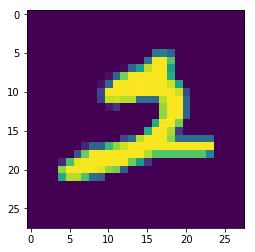

In [15]:
img  = x_test[8245]

%matplotlib inline

img = img.reshape((28,28))
plt.imshow(img)
plt.show()

In [16]:
test_img = img.reshape((1,img_rows,img_cols,1))
img_class = loaded_model.predict_classes(test_img)

print(img_class)

classname = img_class[0]
print("Class : ", classname)

loaded_model.predict(test_img)[0]

[2]
Class :  2


array([1.07286425e-07, 3.38476661e-06, 9.99957800e-01, 9.06647892e-06,
       4.31203915e-07, 7.65635377e-08, 1.69821102e-09, 2.82773417e-05,
       4.58051375e-07, 2.75262892e-07], dtype=float32)